<a href="https://colab.research.google.com/github/cs449w23/project-forceofwill/blob/main/update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 449 Final Project Update

Due: Feburary 24, 2023 at 11:59pm

## 1. Names and Net IDs

- Dennis Wu: YWL7940  
- Will Wu: JWX6086  
- Guandi Wang: GWG5776  
- Ian Cramer: IMC839  
- Uzair Qadir: UMQ7573

## 2. Abstract

This paper explores the use of deep neural networks, including VGG, ResNet, and Visual Transformers, for identifying COVID-19 in X-ray images. We compare the training efficiency of each model and analyze, in comparison to not pretraining, the benefits of pretraining versus pretraining on medical images. We train and evaluate these models on a large dataset of X-ray images of lungs, most healthy and some infected with COVID-19. Our experiments are as of yet still incomplete and therefore so are our conclusions, but we expect pretraining on medical images will provide the greatest benefit and that Visual Transformers will achieve state-of-the-art results with significantly fewer parameters than the other deep learning models. We hope this work will highlight the potential of using deep neural networks for accurate and efficient COVID-19 detection in X-ray images, and provide insights into the importance of pretraining in medical imaging applications, especially when data is limited.

## 3. Big Changes

*Describe any major changes that have taken your project in a new direction. What made you decide to make these changes? Were some things easier or harder than you expected? For example:*

So far we have not had any major changes as our project has been going smoothly for the most part. Still a lot to do as we set our sights pretty high, but we've been able to tackle everything so far.

## 4a. Describe your dataset(s)

The dataset from the provided Kaggle link contains 3,479 JPEG images of X-rays, each with a resolution of 390 pixels by 320 pixels. The dataset also includes a CSV file with two columns - the first column lists the names of each image, and the second column contains a binary label indicating whether COVID-19 was detected in the image (0 for negative and 1 for positive). This dataset has been widely used in research related to COVID-19 detection using machine learning algorithms.

The popularity of this dataset is evident from its high number of citations, which indicates that it has been used extensively in research papers, and has likely contributed to the development of machine learning models for COVID-19 detection in X-ray images.

In [12]:
## 4b. Show some data
"""
    *Demonstrate that you have made at least some progress with getting your
     dataset ready to use. Load at least a few examples and visualize them
     as best you can*
"""
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

path_to_csv = '/content/drive/MyDrive/1. School and Education/2020-2023 Northwestern/2023_Q1_Winter/CS 449 Deep Learning/Project/data'

df = pd.read_csv(f'{path_to_csv}/Training_set_covid.csv')

print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            filename  label
0        Image_1.jpg      1
1        Image_2.jpg      0
2        Image_3.jpg      0
3        Image_4.jpg      0
4        Image_5.jpg      0
...              ...    ...
3474  Image_3475.jpg      0
3475  Image_3476.jpg      0
3476  Image_3477.jpg      0
3477  Image_3478.jpg      1
3478  Image_3479.jpg      0

[3479 rows x 2 columns]


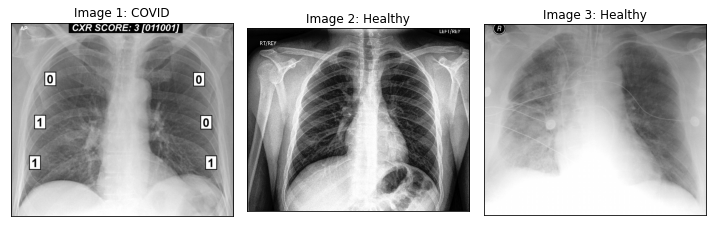

In [18]:
from PIL import Image

path_to_images = '/content/drive/MyDrive/1. School and Education/2020-2023 Northwestern/2023_Q1_Winter/CS 449 Deep Learning/Project/data/train/train'

# Set the number of images to show
n = 3

# Create a figure with subplots for each image
num_cols = n
fig, axes = plt.subplots(1, num_cols, figsize=(10, 10*n))

# Load and display each image in a subplot
for i in range(n):
    img_path = f'{path_to_images}/Image_{i+1}.jpg'
    ax = axes[i]
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    if df.loc[i, "label"]:
        ax.set_title(f'Image {i+1}: COVID')
    else:
        ax.set_title(f'Image {i+1}: Healthy')
    

# Adjust the layout of the subplots
plt.tight_layout()

# Show the figure
plt.show()

## 5. Updated Methods

*This should be an updated version of your methods section from your proposal. Write this section as if the reader hasn't read your original proposal. For example:*

This is a standard supervised learning task, and we plan to train our data on different types of deep neural network, compare and analyse different results. The first one is ResNet, proposed in "Deep Residual Learning for Image Recognition" in 2015. It is originally designed for object detection tasks such as COCO object detection dataset. But it is also widely used nowadays for transfer learning for other upstream machine learning stasks.

The second one is VGG, propsed in "Very Deep Convolutional Networks for Large-Scale Image Recognition" in 2014. This is another CNN based deep learning network architecture that was motivated by "the deeper the networks, the better the results". It is also widely used nowadays for transfer learning for other upstream machine learning stasks.

The third one is vision transformer, proposed in "An image is worth 16x16 words: Transformers for image recognition at scale", it follows the attention mechanism that was commonly used in natural language processing task. It split an image into patches and try to learn not only the representation of each patch, but also the importance of different patch. Finally it aggregate all of the weighted representation generated from patches, and send it to the classifier layer for classification.

For our detection tasks, we will use cross-entropy loss to monitor our traning and classification accuracy to measure the performance of our model.

## 6. Previous Deliverables

*Copy the deliverables from your proposal and write a sentence saying whether you completed this goal, made progress on this goal, or abandoned this goal. Unless you completed the goal, give an explanation of how it went.*

### 6.1 Previous Essential Goals
- We will implement a VGG, ResNet, and a Vision Transformer model, train each on the covid-19 x-ray dataset specified above, and measure the performance of each.
  * So far we have completed implementation of the Vision Transformer and are part way through implementing the VGG. The vision transformer performed reasonably well on the task demonstrating 95% accuracy without any pretraining.

- We will use basic image data augmentation methods to increase the robustness of our tranining. We would pick one or two from the following example , Scaling, Cropping, Flipping, Padding, Rotation, Translation.

### 6.2 Previous Desired Goals
- We will conduct a thorough comparative study on the time complexity of different models when working on this covid-19 dataset. Specifically, we will be comparing which model is more "time efficient", or has a better tradeoff on training time and performance.
- We will also conduct a throrough comparative study on the effect of pretraining on each model to see whether pretraining improves the model's performance or its training time/performance trade off. 

### 6.3 Previous Stretch Goals

- We will further investigate whether pretraining on specifically medical images makes pretraining more effective or beneficial to the model's performance and/or training time/performance trade off.
- We will incoporrate with self-supervised learning to achieve data efficient pretraining.
  * Currently this goal may be beyond our reach.

In [ ]:
# 7. Results So Far
"""
  So far, we have finished using torch dataloader and dataset to generate data loaders for training and testing
  Also, we have finished the first experiment on Vision Transformer (check vit2.ipynb)
  Since the dataset is somehow imbalanced ( pos:neg ~ 400:3400 ), so we also tested using weighted BCE Loss.
  Vision Transformer model with pretraining on ImageNet-1k can reach around F1-score of 95, and with weighted BCE Loss, the F1-score increased to 96.
  We also plotted the training and testing loss curve for observation, and it seems like the network might not fully converge yet.
"""

## 8. New Deliverables

*For any deliverables that you did NOT complete, copy them into these lists below. Then add at least one goal per level.*

8.1 New Essential Goals
  - We still need to finish the implementation of the VGG and ResNet.
  - We will use basic image data augmentation methods to increase the robustness of our tranining. We would pick one or two from the following example , Scaling, Cropping, Flipping, Padding, Rotation, Translation.
  - We also have to include pretraining on other Chest-X Ray datasets, which we have found some from the huggingface dataset website.

8.2 New Desired Goals
  - We will conduct a thorough comparative study on the time complexity of different models when working on this covid-19 dataset. Specifically, we will be comparing which model is more "time efficient", or has a better tradeoff on training time and performance.
  - We will also conduct a throrough comparative study on the effect of pretraining on each model to see whether pretraining improves the model's performance or its training time/performance trade off.
  - Since the label distribution is not very balanced, so we will also try some different approaches to mitigate this statistical bias.

8.3 New Stretch Goal
  - We will further investigate whether pretraining on specifically medical images makes pretraining more effective or beneficial to the model's performance and/or training time/performance trade off.
  - We will incoporrate with self-supervised learning to achieve data efficient pretraining.
  - If possible, we can try different unsupervised pretraining method to incorporate with different domains of Chest X ray dataset
  - 

## 9. Hopes and Concerns

*What's gone well so far? What's been the hardest thing?*

Our main concern is that some of the huge models actually require a large batch size to reach its best performance, but since the image itself is kinda big (800x900), so we can only limit our batch size to 32. We hope that will not affect our final result.

## 10. References

*Cite the papers or sources that you used to discover your datasets and/or models, if you didn't include the citation above. For example:*

Dosovitskiy, Alexey, et al. An image is worth 16x16 words: Transformers for image recognition at scale. arXiv preprint arXiv:2010.11929 (2020).*
.